# Project: Investigation of The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aims to investigate various aspects of "The Movie Database" (TMDB). The project will start with a breif descibtion of the rationale behind the data wrangling done and the Python code for cleaning and trimming the dataset for the analysis of the project. Then, the analysis of the projected are presented in two sections: 1) Comparison between my favorite directors in terms of movie rating, runtime and profit; 2) How have the popularity, reveunues and budgets of superhero movies change over the last 20 years? The final section of the write-up includes a summary of the conclusions and limitations of the project.

In [1]:
#Setting up the environment and libraries.
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This section contains the Python code for cleaning and trimming the dataset for the analysis of the project and the rationale behind the data wrangling done.

### General Properties

> Importing the data and exploring its columns, datatypes and values

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Removal of unwanted data and values

> * ID, IMDB ID, production companies, homepage, genres, cast, overview and tagline are not needed for the research questions of the project.
> * Actual budgets and revnues will not be used, instead, the values to be used are adjusted to account for the amounts in 2015 US dollars.

In [5]:
df=df.drop(columns=['budget', 'revenue', 'id', 'imdb_id', 'production_companies',\
                    'overview', 'tagline', 'homepage', 'cast', 'genres'])

> * The datatype for the release date is corrected.

In [6]:
df['release_date']=pd.to_datetime(df['release_date'])

> * A new column is added for the profit in 2015 US dollars.

In [7]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

> * Some of the analysis will look into the financial aspects of movie production budgets and revenues, therefore, all movies with 0 budget or 0 revenue are deleted, mainly to exclude parodies, short and homemade movies.

In [8]:
df = df.drop(df[df['revenue_adj'] == 0].index)
df = df.drop(df[df['budget_adj'] == 0].index)

<a id='eda'></a>
## Exploratory Data Analysis

> The analysis of the project are presented in two sections: 1) Investigation of the movies of my favorite directors; 2) Investigation into the growing popularity and investment in Superhero movies.

### 1) Comparison between my favorite directors in terms of movie rating, runtime and profit

> 4 directors were chosen for comparison: 
>1) Quentin Tarantino
>2) David Lynch
>3) Martin Scorsese
>4) Christopher Nolan

In [9]:
favorite_directors = (df.loc[df['director'] == 'Quentin Tarantino'])\
    .append(df.loc[df['director'] == 'David Lynch'])\
    .append(df.loc[df['director'] == 'Martin Scorsese'])\
    .append(df.loc[df['director'] == 'Christopher Nolan'])

favorite_average=favorite_directors.groupby('director', as_index=False).mean()

> A list of all movies of the 4 directors were constructed and means were taken for all numerical data.

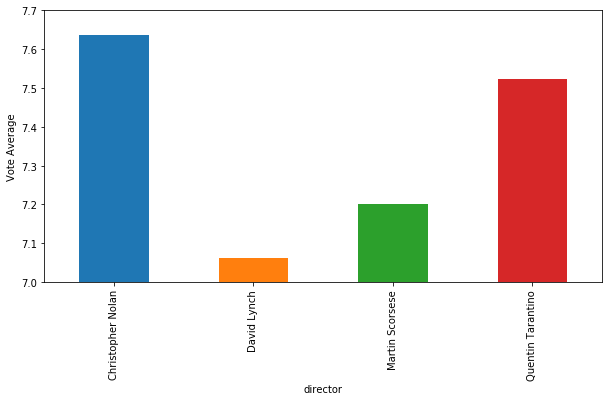

In [10]:
ax1=favorite_average.plot.bar(x= 'director', y= 'vote_average', ylim = (7,7.7), figsize = [10, 5], legend=False);
ax1.set_ylabel('Vote Average');

> As can be seen, Christopher Nolan's movies usually gets significantly higher rating then others.

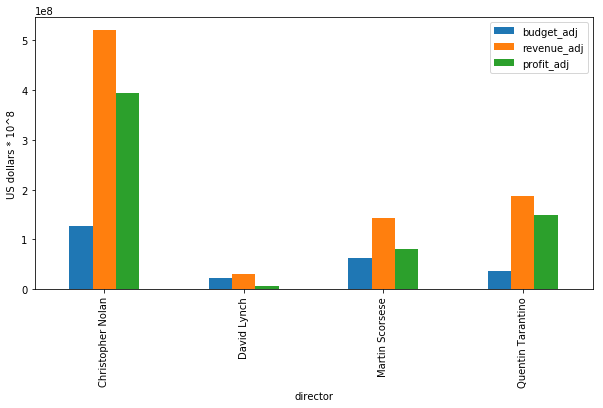

In [11]:
ax2=favorite_average.plot.bar(x= 'director', y= ['budget_adj', 'revenue_adj', 'profit_adj'], figsize = [10, 5]);
ax2.set_ylabel('US dollars * 10^8');

> Christopher Nolan's movies are also usually significantly larger in terms of budget, revenue and profit.

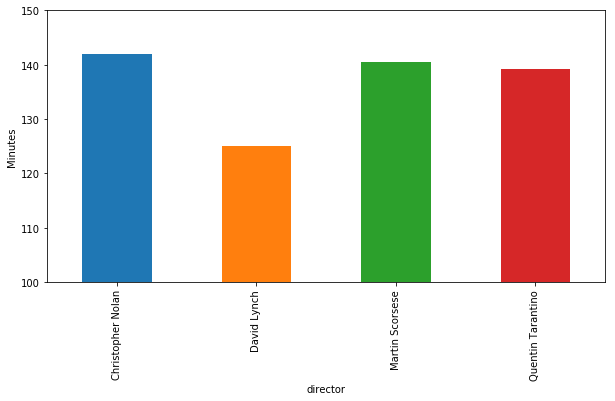

In [12]:
ax3=favorite_average.plot.bar(x= 'director', y= 'runtime', ylim = (100,150), figsize = [10, 5], legend=False);
ax3.set_ylabel('Minutes');

> Nolan, Scorsese and Tarantino movies have very close average runtimes, on the otherhand, Lynch movies are usually fairly shorter. 

### 2) How have the popularity, reveunues and budgets of superhero movies change over the last 20 years?

In [13]:
df[['kw1', 'kw2', 'kw3', 'kw4', 'kw5']]=df['keywords'].str.split('|', expand = True)
df.drop(columns = 'keywords', inplace = True)
superhero_movies_df= (df.loc[df['kw1'] == 'superhero'])\
    .append(df.loc[df['kw2'] == 'superhero'])\
    .append(df.loc[df['kw3'] == 'superhero'])\
    .append(df.loc[df['kw4'] == 'superhero'])\
    .append(df.loc[df['kw5'] == 'superhero'])

> Using keywords, all superhero movies were gathered in 1 dataframe.

In [14]:
superhero_movies_df = superhero_movies_df.groupby('release_year', as_index=False).mean()

> Means of numerical data of Superhero movies were grouped by release years.

In [15]:
superhero_movies_df['revenue_ma'] = superhero_movies_df['revenue_adj'].rolling(window=5).mean()
superhero_movies_df['budget_ma'] = superhero_movies_df['budget_adj'].rolling(window=5).mean()
superhero_movies_df['popularity_ma'] = superhero_movies_df['popularity'].rolling(window=5).mean()

> A 5 year moving average was applied to smooth out the data.

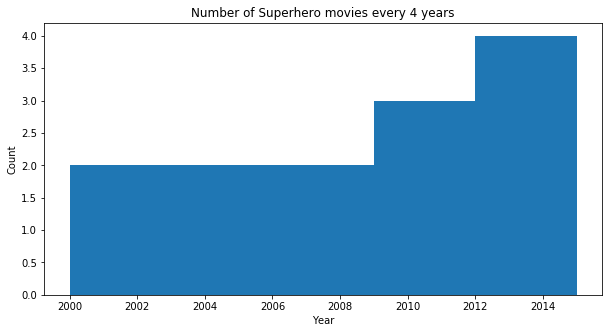

In [16]:
superhero_movies_dfh= (superhero_movies_df.loc[superhero_movies_df['release_year'] > 1998])
ax4 = superhero_movies_dfh['release_year'].plot.hist(figsize = [10, 5], bins = 5);
ax4.set_title('Number of Superhero movies every 4 years');
ax4.set_ylabel('Count');
ax4.set_xlabel('Year');

> As can be seen the number of Superhero movies is increasing with time.

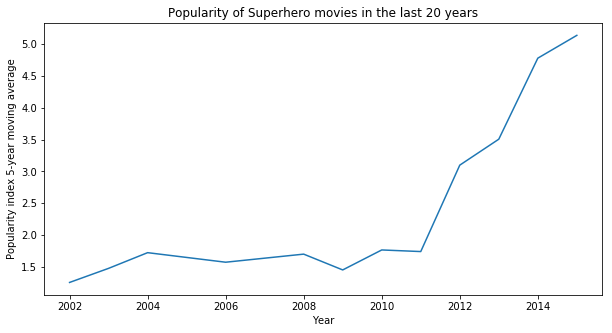

In [17]:
ax5 = superhero_movies_df.plot.line(x='release_year', y='popularity_ma', figsize = [10, 5], legend=False, title = 'Popularity of Superhero movies in the last 20 years');
ax5.set_ylabel('Popularity index 5-year moving average');
ax5.set_xlabel('Year');

> Popularity of Superhero movies have been increasing sharply between 2009 and 2015

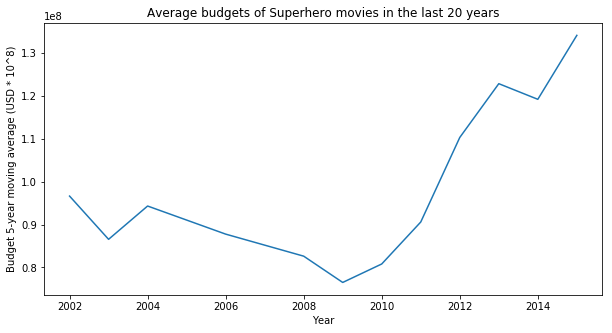

In [18]:
ax6 = superhero_movies_df.plot.line(x='release_year', y='budget_ma', figsize = [10, 5], legend=False, title = 'Average budgets of Superhero movies in the last 20 years');
ax6.set_ylabel('Budget 5-year moving average (USD * 10^8)');
ax6.set_xlabel('Year');

> Investment in Superhero movies production budgets is also seen increasing sharply between 2009 and 2015

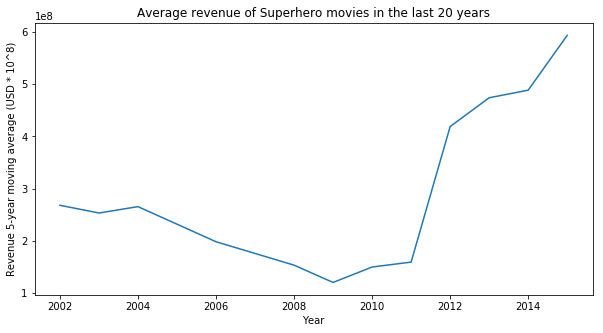

In [19]:
ax7 = superhero_movies_df.plot.line(x='release_year', y='revenue_ma', figsize = [10, 5], legend=False, title = 'Average revenue of Superhero movies in the last 20 years');
ax7.set_ylabel('Revenue 5-year moving average (USD * 10^8)');
ax7.set_xlabel('Year');

> Revenues are going up as well!

<a id='conclusions'></a>
## Conclusions

> **Favorite Directors:** The findings have shown higher investment and rating for Nolan's movies as opposed to other directors. Lynch movies were found to be shorter on average compared to the other 3 directors. However, it is worth mentioning that a further look into the dataset can show that the vote count can sometimes be as low as 180 votes, which limits the representativeness of the movie rating.

> **Superhero Movies:** An inclining trend was observed on the number of Superhero movies in the recent years. Furthermore, a sharp increase was observed on the popularity, budgets and revenues. This can be attributed to the very popular series of movies that were kicked-off by Marvel at 2008 and DC/ Warner Bros. at 2013 in addtion to their previous 3 Batman movis by Nolan. However, there are multiple limitations to the analysis that are worth noting. First, is the quality of the dataset, not all Superhero movies are keyworded with "Superhero" and this affects the data gathering method that was used to construct the superhero movie dataframe. Furthermore, it cannot be guaranteed that all movies produced in the investigated period are available in the dataset, hence, the representativeness of the histogram is limited. Another issue with the analysis is that not much is known about the way the popularity index is calculated, if for example a factor of calculating this index is the movie revenue, then the popularity line chart is meaningless as it will always corelate to revenue.